In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [2]:
## info of patients with ibd
file_path = os.path.join(os.path.abspath('..'), 'data', 'patients_ibd.csv')

patients_ibd = pd.read_csv(file_path)
patients_ibd.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10030412,F,38,2142,2008 - 2010,NaN
1,10203641,F,39,2165,2008 - 2010,NaN
2,10865431,F,30,2158,2008 - 2010,NaN
3,12806352,M,41,2124,2011 - 2013,NaN
4,13351753,F,20,2170,2008 - 2010,NaN


In [3]:
# Mortality: live or death
live_patients = patients_ibd[~pd.notna(patients_ibd.dod)]
dead_patients = patients_ibd[pd.notna(patients_ibd.dod)]

print('Number of live patients:', live_patients.shape[0])
print('Number of dead patients:', dead_patients.shape[0])
mortality_rate = dead_patients.shape[0] / (live_patients.shape[0] + dead_patients.shape[0])
print('Mortality rate:', round(mortality_rate, 2))

Number of live patients: 924
Number of dead patients: 213
Mortality rate: 0.19


In [12]:
def describe_each_attr(df: pd.DataFrame, not_needed=['subject_id', 'anchor_age', 'anchor_year', 'dod']) -> None:
    for col_name in df.columns:
        if col_name in not_needed: continue
        print(df[col_name].value_counts())
        print()

describe_each_attr(patients_ibd)

gender
F    603
M    534
Name: count, dtype: int64

anchor_year_group
2008 - 2010    648
2011 - 2013    327
2014 - 2016    162
Name: count, dtype: int64

age_group
>55      533
36-55    345
18-35    259
Name: count, dtype: int64



In [13]:
# 划分年龄段
def category_from_age(age: int) -> str:
    if age < 18:
        return '<18'
    elif age < 35:
        return '18-35'
    elif age < 55:
        return '36-55'
    else:
        return '>55'

patients_ibd['age_group'] = patients_ibd.anchor_age.apply(category_from_age)
patients_ibd.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,age_group
0,10030412,F,38,2142,2008 - 2010,NaN,36-55
1,10203641,F,39,2165,2008 - 2010,NaN,36-55
2,10865431,F,30,2158,2008 - 2010,NaN,18-35
3,12806352,M,41,2124,2011 - 2013,NaN,36-55
4,13351753,F,20,2170,2008 - 2010,NaN,18-35


In [7]:
# How long patients who would die could live? 
days_since_anchor = pd.to_datetime(dead_patients.dod, format='%Y-%m-%d') - pd.to_datetime(dead_patients.anchor_year, format='%Y')
dead_patients.loc[:, 'days_since_anchor'] = days_since_anchor

In [8]:
# Group by ... from days_since_anchor
def groupby_a_from_b(df, a, b):
    return df.loc[:, [a, b]].groupby(a).mean()

print(groupby_a_from_b(dead_patients, 'gender', 'days_since_anchor'))
print(groupby_a_from_b(dead_patients, 'anchor_year_group', 'days_since_anchor'))
print(groupby_a_from_b(dead_patients, 'anchor_age', 'days_since_anchor'))

                  days_since_anchor
gender                             
F      1325 days 16:31:28.524590160
M      1493 days 14:46:09.230769232
                            days_since_anchor
anchor_year_group                            
2008 - 2010                1689 days 19:12:00
2011 - 2013       935 days 09:41:03.157894736
2014 - 2016                 772 days 00:00:00
                      days_since_anchor
anchor_age                             
24                    887 days 00:00:00
30                   1211 days 00:00:00
34                   2088 days 00:00:00
37                   3223 days 12:00:00
39                   2362 days 00:00:00
40                    468 days 00:00:00
42                   2328 days 00:00:00
43                    754 days 00:00:00
44                   1702 days 00:00:00
45                   1424 days 00:00:00
46                   1010 days 00:00:00
48                   3958 days 00:00:00
49                   1123 days 12:00:00
50                   1771 

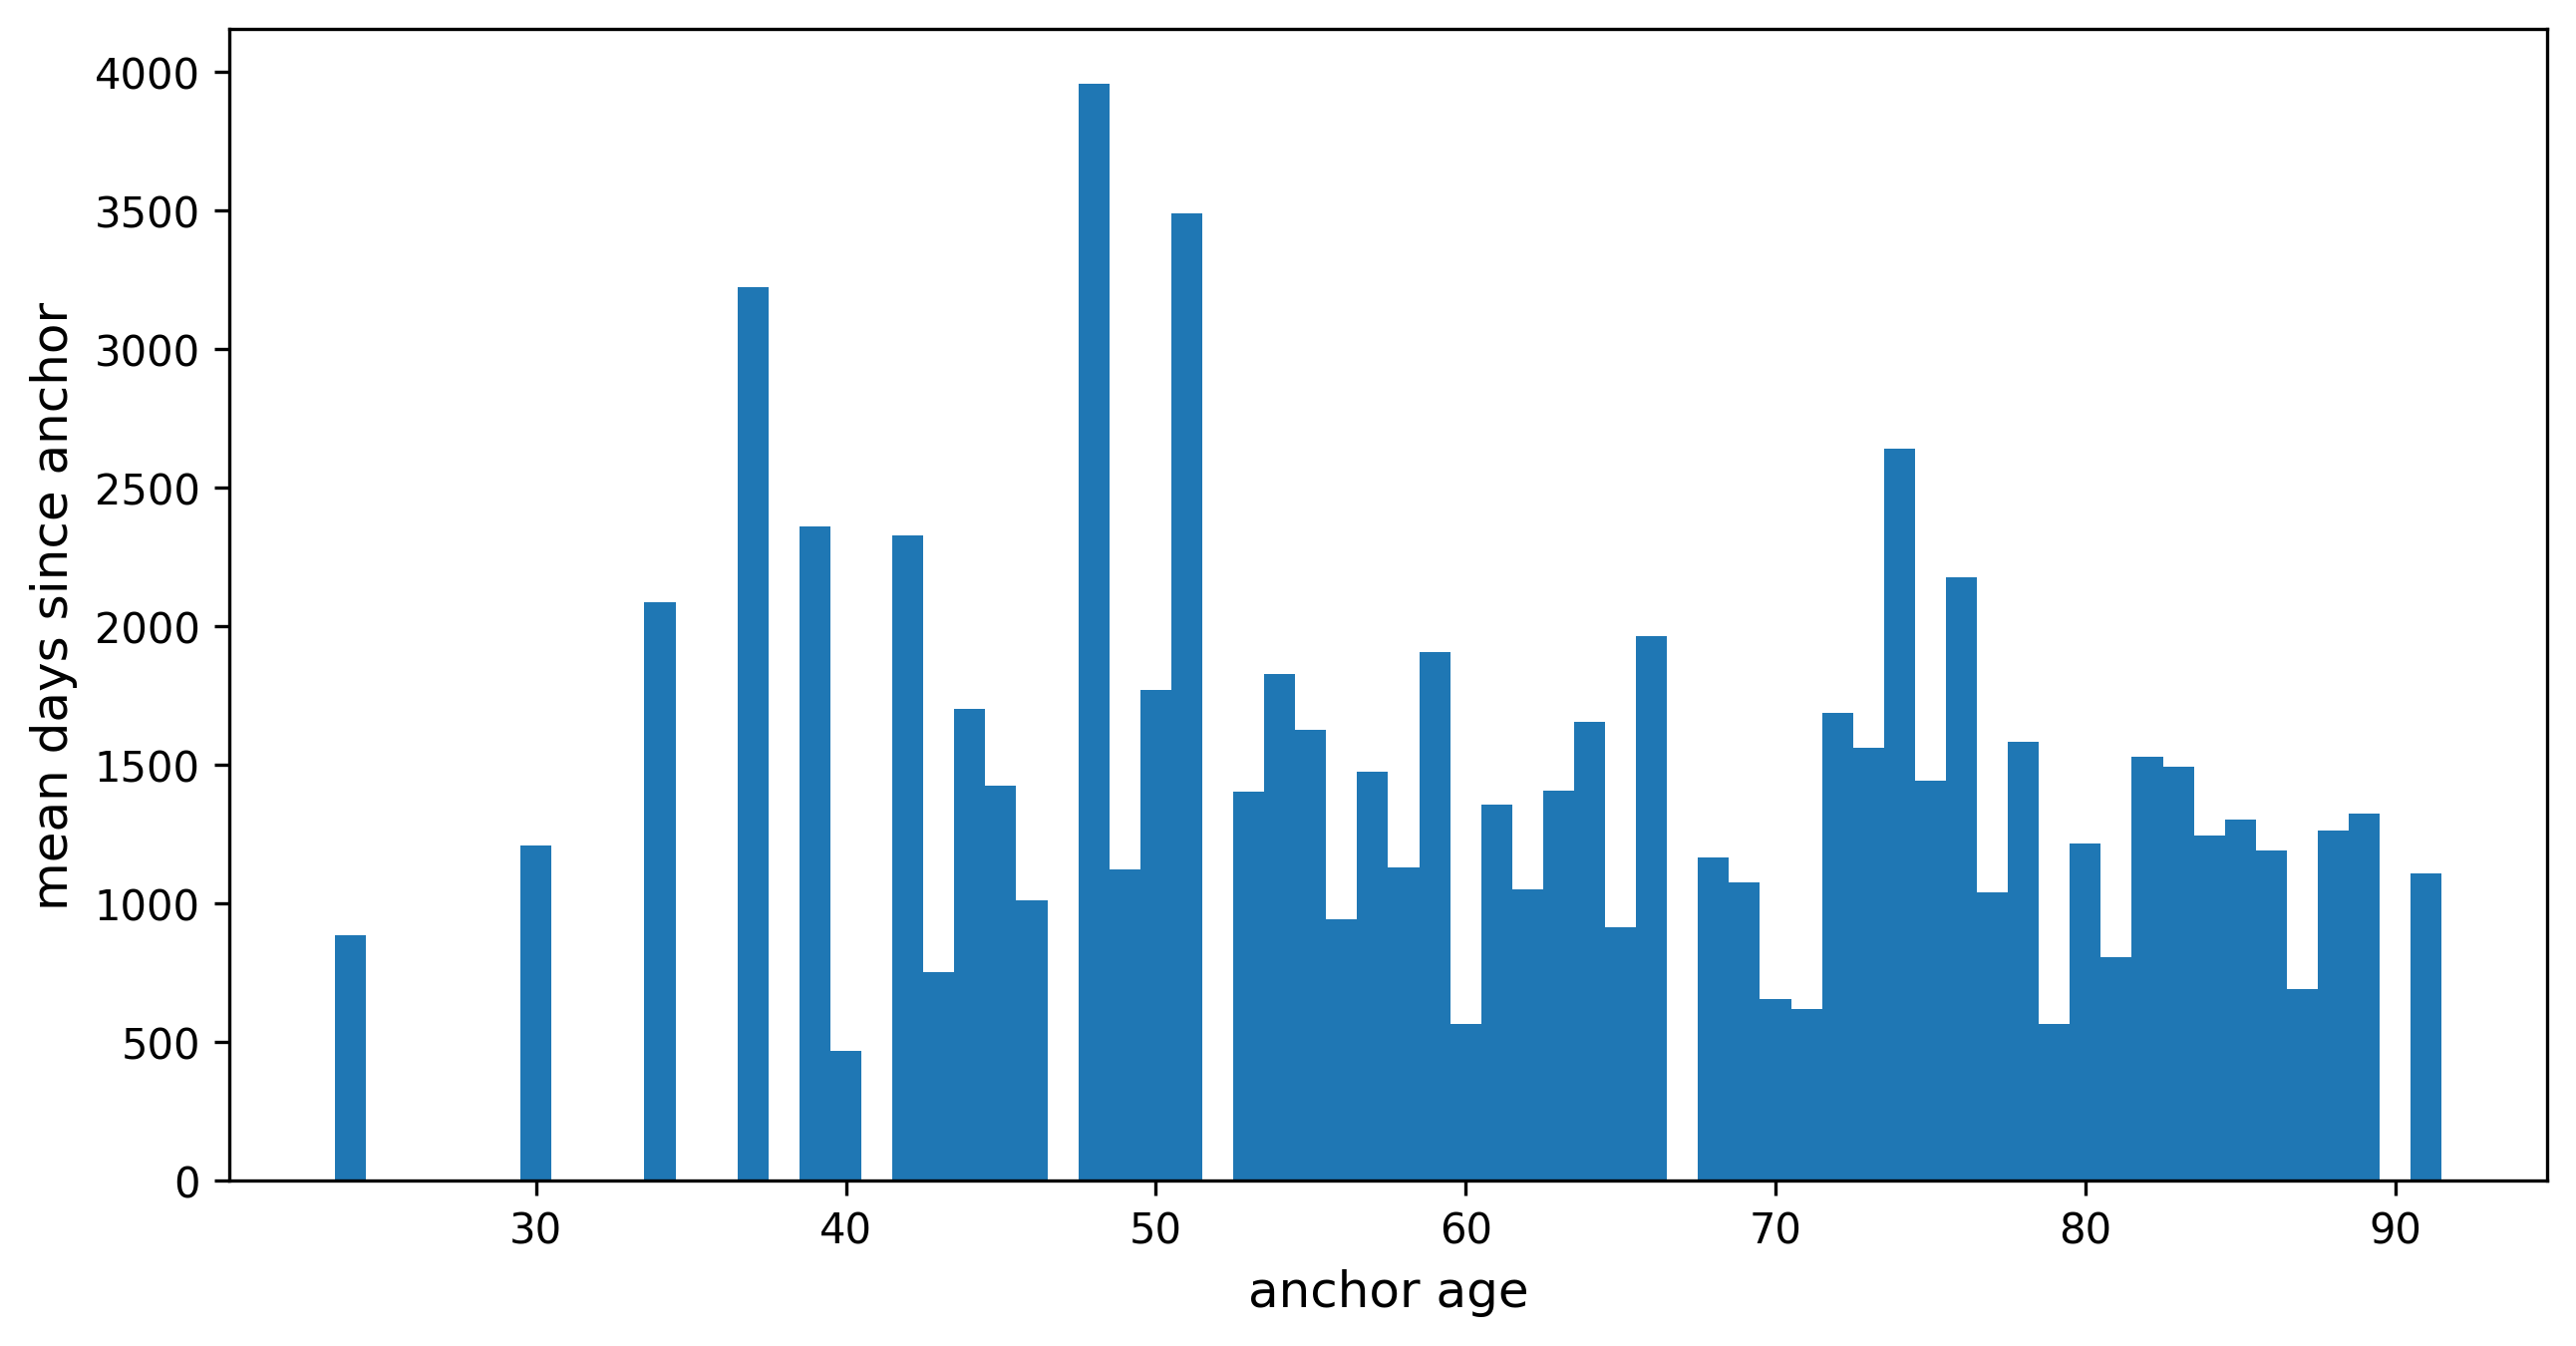

In [9]:
groupby_age_from_days_since_anchor = groupby_a_from_b(dead_patients, 'anchor_age', 'days_since_anchor')
x = groupby_age_from_days_since_anchor.index
y = groupby_age_from_days_since_anchor.days_since_anchor.dt.days

plt.figure(figsize=(10, 5), dpi=300)
plt.bar(x, y, width=1)
plt.ylabel('mean days since anchor', fontsize=12)
plt.xlabel('anchor age', fontsize=12)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = [r'C:\Windows\Fonts\Times New Roman.ttf']
plt.show()

In [23]:
# Matrix
X = np.matrix([
    [1, 2, 3],
    [2, 3, 4]
]).T
print(f'X:\n{X}\n')

W = np.matrix([
    [1],
    [2]
])
print(f'W:\n{W}\n')

print(f'Y=XW:\n{X@W}')

X:
[[1 2]
 [2 3]
 [3 4]]

W:
[[1]
 [2]]

Y=XW:
[[ 5]
 [ 8]
 [11]]
